## Lab 7 Бинарная классификация

Построить не менее двух моделей бинарной классификации на данных:

📁 https://disk.yandex.ru/i/2qFbBhSeoiyiow

**О датасете:**

Датасет Pima Indians Diabetes Database используется для предсказания вероятности развития диабета на основе различных факторов. Этот датасет состоит из 8 признаков, которые описывают характеристики пациентов. Вот список этих признаков:

	1.	Pregnancies — количество беременностей.
	2.	Glucose — уровень глюкозы в крови (в молях на децилитр).
	3.	BloodPressure — уровень артериального давления (в мм рт. ст.).
	4.	SkinThickness — толщина кожной складки на трицепсе (в мм).
	5.	Insulin — уровень инсулина в крови (в микед/мл).
	6.	BMI (Body Mass Index) — индекс массы тела (в кг/м²).
	7.	DiabetesPedigreeFunction — функция предрасположенности к диабету, основанная на семейной истории.
	8.	Age — возраст пациента (в годах).

🎯 Целевая переменная:

	•	Outcome — наличие или отсутствие диабета (1 — диабет, 0 — нет диабета).

In [7]:
# ваш код здесь
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import datasets


In [28]:
df = pd.read_csv('./data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [53]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


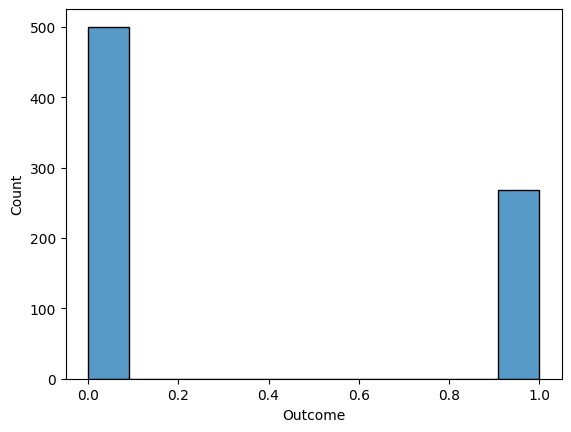

In [9]:
sns.histplot(df['Outcome'])
plt.show()

In [10]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']


In [51]:
features = df.columns
features = features.drop('Outcome')
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [11]:
X, y = SMOTE().fit_resample(X, y) 

/Users/andreypovaliy/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


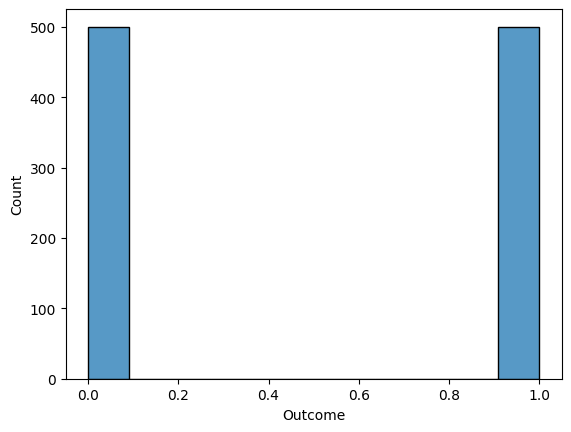

In [12]:
sns.histplot(y)
plt.show()

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, stratify=y)

# KNN

In [16]:
k_values = range(1,21)
mean_score = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=20, scoring='accuracy')
    mean_score.append(scores.mean())

best_k = k_values[np.argmax(mean_score)]
print(f'Best k={best_k} ; accuracy:{max(mean_score):.3f}')

Best k=1 ; accuracy:0.825


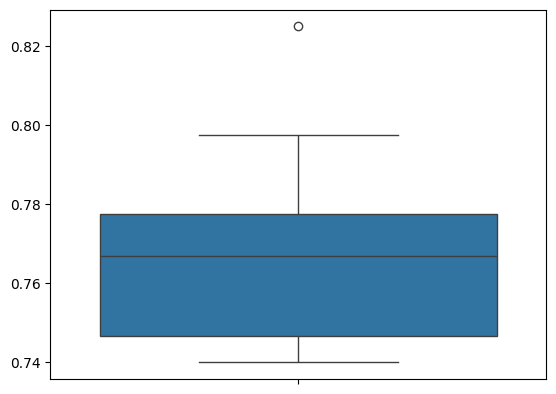

In [17]:
sns.boxplot(mean_score)
plt.show()

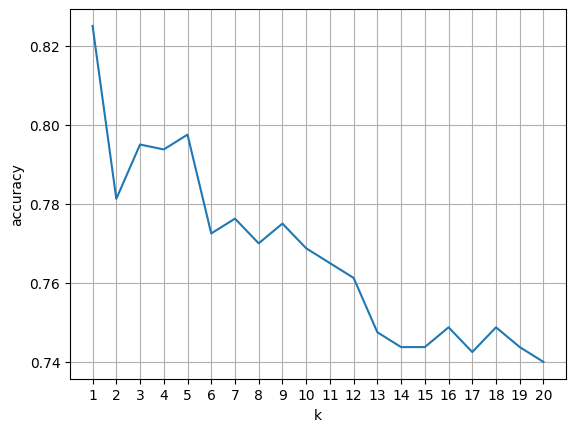

In [18]:
plt.plot(k_values, mean_score)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)


knn.fit(X_train, y_train)
y_pred_train = knn.predict(X_train)
y_pred_test =  knn.predict(X_test)

In [34]:
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
precision_train = precision_score(y_train, y_pred_train)
precision_test = precision_score(y_test, y_pred_test)
recall_train = recall_score(y_train, y_pred_train)
recall_test = recall_score(y_test, y_pred_test)

print(f'accuracy train: {accuracy_train:.3f}')
print(f'accuracy test: {accuracy_test:.3f}')
print(f'f1 train: {f1_train:.3f}')
print(f'f1 test: {f1_test:.3f}')
print(f'precision train: {precision_train:.3f}')
print(f'precision test: {precision_test:.3f}')
print(f'recall train: {recall_train:.3f}')
print(f'recall test: {recall_test:.3f}')

accuracy train: 0.864
accuracy test: 0.770
f1 train: 0.870
f1 test: 0.785
precision train: 0.830
precision test: 0.737
recall train: 0.915
recall test: 0.840


In [35]:
report = classification_report(y_test, y_pred_test)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       100
           1       0.74      0.84      0.79       100

    accuracy                           0.77       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.77      0.77       200



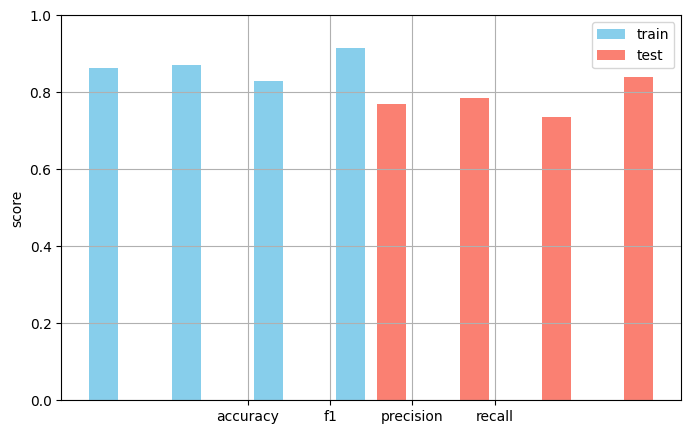

In [36]:
metrics = ['accuracy', 'f1', 'precision', 'recall']
scores_train = [accuracy_train, f1_train, precision_train, recall_train]
scores_test = [accuracy_test, f1_test, precision_test, recall_test]

x = np.arange(len(metrics))

plt.figure(figsize=(8,5))
width = 0.35
plt.bar(x - width/0.2, scores_train, width=width, label='train', color='skyblue')
plt.bar(x + width/0.2, scores_test, width=width, label='test', color = 'salmon')

plt.xticks(x, metrics)
plt.ylabel('score')
plt.ylim(0,1)
plt.grid()
plt.legend()
plt.show()

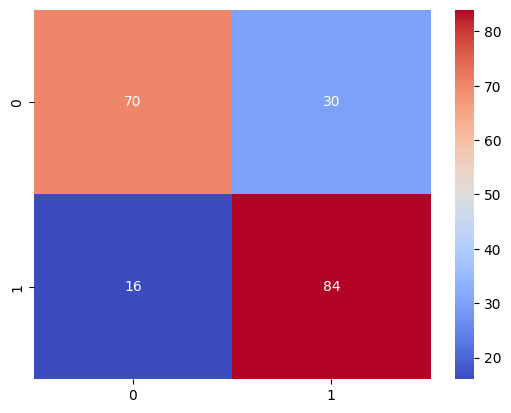

In [37]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

# Logit

In [38]:
log_reg = LogisticRegression(penalty='l2', C=0.9, solver='saga', random_state = 1)
log_reg.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)


accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)


In [39]:
report_log_reg_train = classification_report(y_train, y_pred_train)
print(report_log_reg_train)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74       400
           1       0.74      0.72      0.73       400

    accuracy                           0.74       800
   macro avg       0.74      0.74      0.74       800
weighted avg       0.74      0.74      0.74       800



In [40]:
report_log_reg_test = classification_report(y_test, y_pred_test)
print(report_log_reg_test)

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       100
           1       0.76      0.77      0.77       100

    accuracy                           0.77       200
   macro avg       0.77      0.77      0.76       200
weighted avg       0.77      0.77      0.76       200



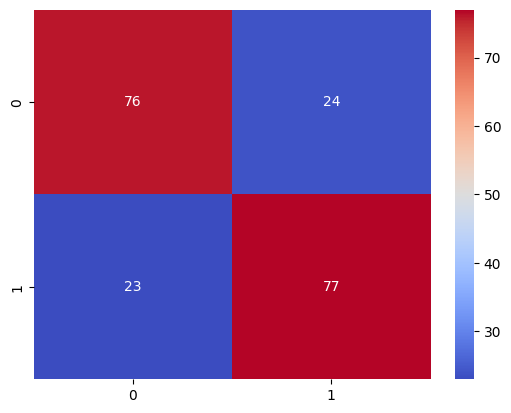

In [41]:
cm_log_reg = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm_log_reg, annot=True, cmap='coolwarm')
plt.show()

In [42]:
probabilities = log_reg.predict_proba(X_test)
print(probabilities)

[[0.37643657 0.62356343]
 [0.02985281 0.97014719]
 [0.84787084 0.15212916]
 [0.50771569 0.49228431]
 [0.74155075 0.25844925]
 [0.78486189 0.21513811]
 [0.34724009 0.65275991]
 [0.80034087 0.19965913]
 [0.87736114 0.12263886]
 [0.16847457 0.83152543]
 [0.23423806 0.76576194]
 [0.64270617 0.35729383]
 [0.56434916 0.43565084]
 [0.59230354 0.40769646]
 [0.53847143 0.46152857]
 [0.22758808 0.77241192]
 [0.8335849  0.1664151 ]
 [0.64629536 0.35370464]
 [0.7168388  0.2831612 ]
 [0.41501103 0.58498897]
 [0.84469519 0.15530481]
 [0.14938449 0.85061551]
 [0.59654609 0.40345391]
 [0.22937067 0.77062933]
 [0.54628673 0.45371327]
 [0.56179444 0.43820556]
 [0.60491005 0.39508995]
 [0.8302868  0.1697132 ]
 [0.42554342 0.57445658]
 [0.45533691 0.54466309]
 [0.15809116 0.84190884]
 [0.72707026 0.27292974]
 [0.8991735  0.1008265 ]
 [0.45641496 0.54358504]
 [0.37036352 0.62963648]
 [0.80717971 0.19282029]
 [0.22203679 0.77796321]
 [0.89780226 0.10219774]
 [0.12872459 0.87127541]
 [0.84099022 0.15900978]


In [43]:
y_test

582    0
861    1
742    0
683    1
616    0
      ..
121    0
413    0
67     0
138    0
46     0
Name: Outcome, Length: 200, dtype: int64

In [44]:
params = { 'penalty': ['l1', 'l2'],
           'C': [0.01, 0.1, 1, 10, 100],
           'solver': ['liblinear', 'saga']
}
gs = GridSearchCV(LogisticRegression(), params, cv=5, scoring='accuracy')
gs.fit(X_train, y_train)
print(gs.best_params_)
print(gs.best_score_)

{'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.7325


In [45]:
log_reg_param = LogisticRegression(penalty='l1', C=10, solver='liblinear', random_state = 1)
log_reg_param.fit(X_train, y_train)

y_pred_train = log_reg_param.predict(X_train)
y_pred_test = log_reg_param.predict(X_test)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

In [46]:
print(f'accuracy train: {accuracy_train:.3f}')
print(f'accuracy test: {accuracy_test:.3f}')

accuracy train: 0.738
accuracy test: 0.765


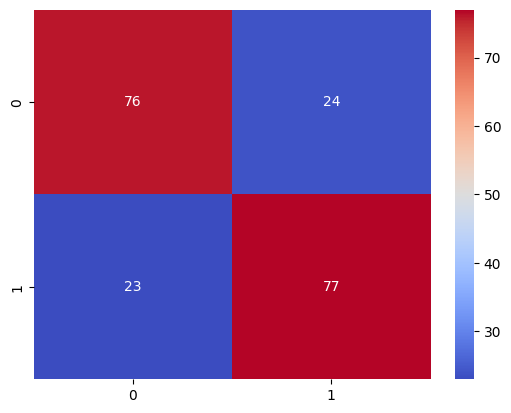

In [47]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

# DECISION TREE

In [48]:
d_tree = DecisionTreeClassifier(max_depth=2, max_features=3, random_state=1)
d_tree.fit(X_train, y_train)

y_pred_train = d_tree.predict(X_train)
y_pred_test = d_tree.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f'accuracy train: {accuracy_train:.3f}')
print(f'accuracy test: {accuracy_test:.3f}')

accuracy train: 0.709
accuracy test: 0.700


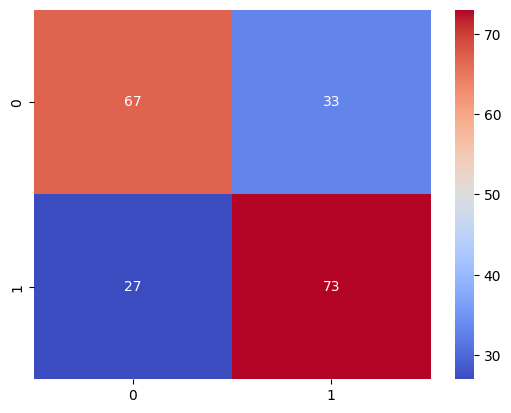

In [49]:
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

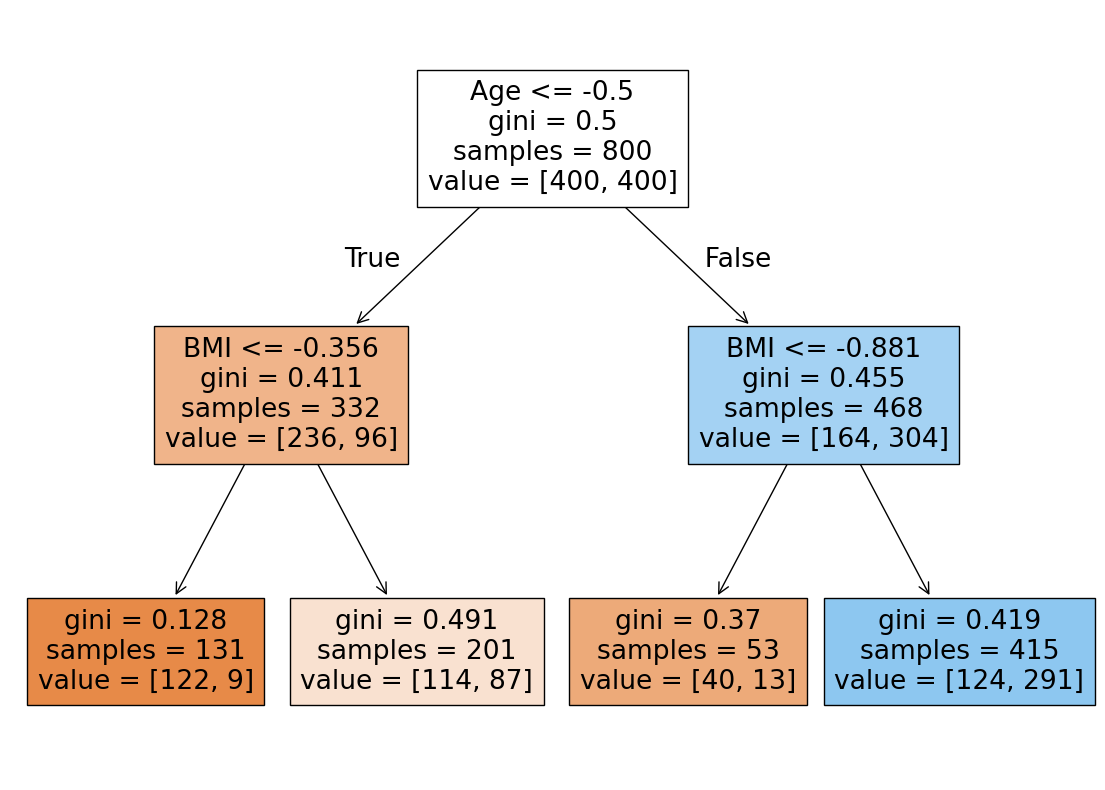

In [52]:
plt.figure(figsize=(14, 10))
plot_tree(d_tree, filled=True, feature_names=features)
plt.show()